<p>From the time when the world was created, every living being in this world thrive to meet the three most necessary commodities to live: food, clothing and shelter. For the current time, we are going to focus only on one i.e, shelter. This is something that every person can call as thier home, a place where they could live freely. The quest for shelter is a fundamental aspect of human existence, that is deeply connected with our emotions.</p> 
<p>With the world of growing population and reapid technological advancement, the hunt for suitable houses have taken a new dimension. Previously, people had to travel from location to location for countless hours in seach of right place to live at the right price. Thanks to the marvels of modern technology, and especially the advancement in internet, finding homes have become easier with just few taps on the screen. But there are still some problem amongst these, with so many options out ther, how to choose which is the best deal for you?</p>
<p>That's where Machine learning comes in. A statistical method that makes use of the currently available data-like how big a house is, where it's located, and how many rooms it has and predictive algorithm that could predict the price of the house.</p>
<p>So in this project we're going to build some machine learning models that could predict the cost of the house. We will examine their performance and choose the one that can help people make smarter decision in buying a house.  </p>
<p>Let's dive in by importing some necessary libraries. These libraries are like some toolbox that help us work with data</p>
<p>First up is NumPy. It is a mathematical library that's just like a calculator. It cal be used to work with heavy and pleanty of numerical data </p>
<p>Next, we've got Pandas. It's a library that can handle data tables like a spreadsheet in excel. Pandas helps us load data, organize it neatly, and perform all sorts of operations on it. </p>
<p>About Matplotlib and Seavorn, these are tools that are used to visualize the data</p>


In [2]:
# !pip install numpy pandas matplotlib seaborn scikit-learn joblib

In [3]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<p>Now as we have put all the libraries together, let's start first by loading the data</p>

### 1. Load the dataset

In [4]:
orig_data = pd.read_csv("train.csv")
orig_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
orig_data.shape

(29451, 12)

In [6]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


The shape of the dataset is (29451, 12), meaning there are 12 columns with 29451 records. Let's try to know more about the data.
<p>By looking at the head, we can say that the 12 columns contain</p>
Categorical data
<p>There are two categorical features that consists of nominal feature in the dataset</p>
<ul>
<li>Posted by: The seller of the house</li>
<li>BHK or RK: Does the house has a bedroom hall kitchen(BHK) or just a room and kitchen (RK)</li>
</ul>
Numerical although categorical
<p>Even these are nominal data but without any inherent order or ranking. They represent yes or no type of features</p>
<ul>
<li>Under construction</li>
<li>Rera</li>
<li>Ready to move</li>
<li>Resale</li>
</ul>
Coninuous data
<p>The data contains numerical data as well that are mentioned below with their corresponding meaning</p>
<ul>
<li>Square FT: The area of the house, the are is in square feet</li>
<li>Longitude: The coordinate of the geographic location (East or West) of the house</li>
<li>Latitude: The coordinate of the geographic location (North or South) of the house</li>
<li>Target price: The price of the house</li>
<li>BHK_NO.: The number of rooms in the house</li>
</ul>

In [7]:
orig_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


#### Based on the description of the data, here are some observations for each feature:

<li><strong>UNDER_CONSTRUCTION and RERA:</strong></li>

These are binary features indicating whether the property is under construction and whether it is RERA compliant.
The mean values suggest that approximately 17.9% of the properties are under construction, and about 31.7% are RERA compliant.

<li><strong>NUM_ROOMS:</strong></li>

This feature represents the number of rooms in the property.
The mean value indicates an average of about 2.39 rooms per property.

<li><strong>SQUARE_FT:</strong></li>

This feature represents the area of the property in square feet.
The description shows that this feature contains outliers and it is even skewed to right, meaning the tail of the distrubution could be stretched towards right

<li><strong>READY_TO_MOVE and RESALE:</strong></li>

These are binary features indicating whether the property is ready to move in and whether it is a resale property.
Most properties (approximately 82%) are ready to move in, and the majority (about 92.9%) are resale properties.

<li><strong>LONGITUDE and LATITUDE:</strong></li>

These features represent the geographical coordinates of the properties.
The mean longitude and latitude values provide an average location for the properties.
The minimum and maximum values indicate the range of locations covered in the dataset.
These features do not contain any outlier as they lie within the real world geographical coordinates.

<li><strong>PRICE:</strong></li>

This feature represents the price of the property.
Just like Area (Sq.ft), even the target variable contains outlier that need to be handled


In [8]:
orig_data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

Overall there are 11 independent features (predictors) and one dependent feature (target) in the dataset

### 2. Exploratory Data Analysis (EDA)

#### 2.1 Check for missing values

In [9]:
orig_data.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

From the information itself, it was clear that the data does not contain any missing values, and from the above cell it is confirmed that there is no presence in any of the features. Thus there is no need to handle missing values

#### 2.2 Dropping duplicate values

The dataset contains some duplicates that I choose to remove from the datset

In [10]:
dulpicates = orig_data.duplicated()
orig_data[dulpicates]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
1904,Dealer,1,0,3,BHK,1209.628644,0,1,"Salt Lake,Kolkata",22.541110,88.337780,100.0
2351,Dealer,0,0,2,BHK,896.680112,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,28.9
2611,Dealer,0,0,3,BHK,1350.256549,1,1,"Sector 78 Faridabad,Faridabad",28.380160,77.369936,50.0
2618,Dealer,1,0,2,BHK,800.000000,0,1,"Chandapura,Bangalore",12.800090,77.711820,27.0
3211,Owner,0,0,2,BHK,712.105799,1,1,"BataNagar,Kolkata",22.506860,88.223965,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29321,Dealer,0,1,1,BHK,649.641577,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,14.5
29345,Dealer,1,1,3,BHK,1563.155686,0,1,"Sector-88 Mohali,Mohali",30.684523,76.691728,74.5
29357,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.596320,77.381430,75.0
29389,Builder,1,0,3,BHK,979.290979,0,0,"Barasat,Kolkata",22.747639,88.600902,27.9


In [11]:
orig_data = orig_data.drop_duplicates()

Renaming few columns

In [12]:
orig_data.rename(columns={"BHK_NO.": "NUM_ROOMS", "TARGET(PRICE_IN_LACS)":"PRICE"},  inplace=True)
orig_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [13]:
orig_data["PRICE"].max()

30000.0

# Visualization

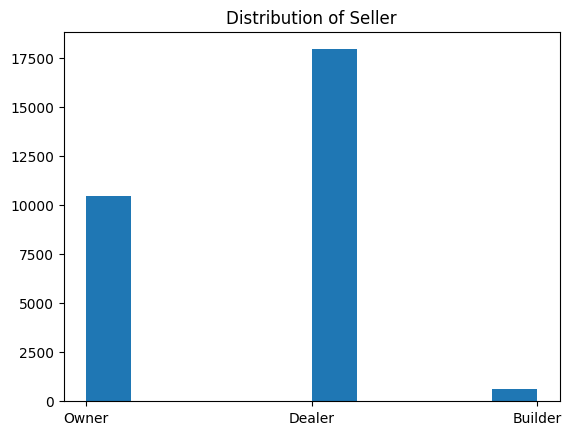

In [14]:
plt.hist(data=orig_data, x="POSTED_BY")
plt.title("Distribution of Seller")
plt.show()

Most of the houses are sold by the dealers, then Owner and finally Builder

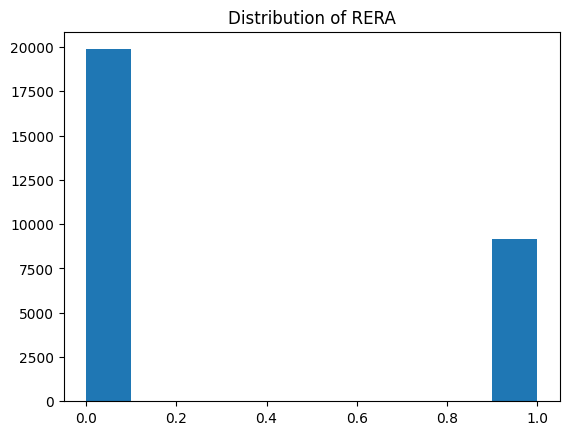

In [15]:
plt.hist(data=orig_data, x="RERA")
plt.title("Distribution of RERA")
plt.show()

Number of houses not registered is almost two time higher than the one that are registered

In [16]:
orig_data["BHK_OR_RK"].value_counts()

BHK_OR_RK
BHK    29026
RK        24
Name: count, dtype: int64

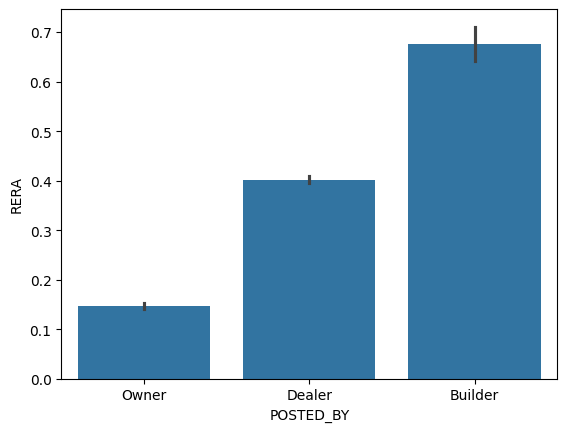

In [17]:
sns.barplot(data=orig_data, x="POSTED_BY", y="RERA")
plt.show()

The figures show that even if the frequency of houses sold by builder is much less than the other two sellers, they are the sellers who have contributed in maximum registration of house

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

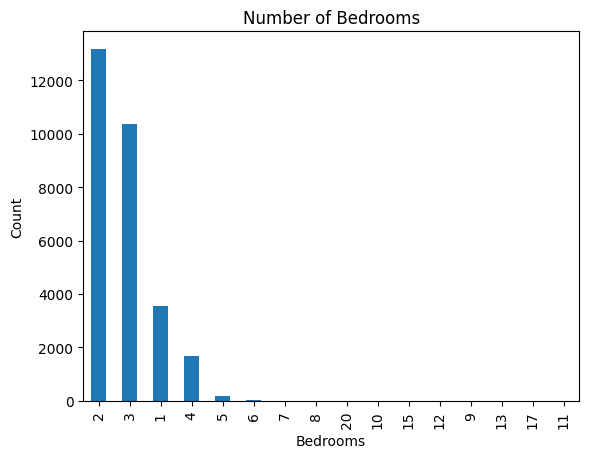

In [18]:
orig_data["NUM_ROOMS"].value_counts().plot(kind="bar")
plt.title("Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
sns.despine

As seen from the visualization, 2 bedroom house are most commonly sold followed by 3 and then 1 bedrooms

Visualizing location of houses based on latitude and longitude

<Figure size 1000x1000 with 0 Axes>

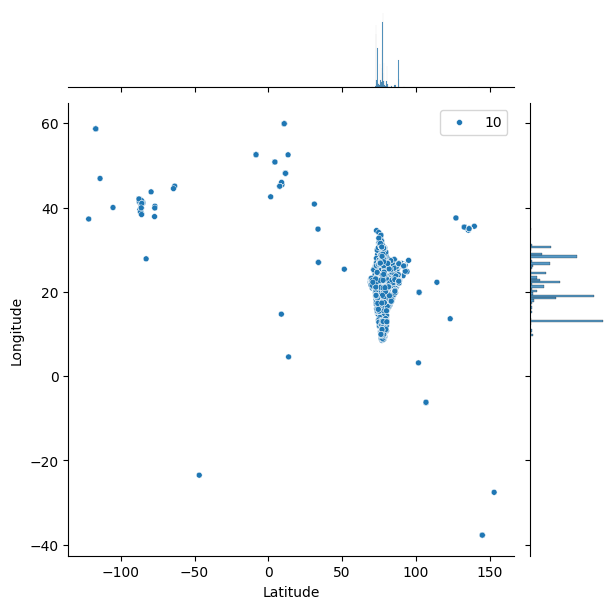

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [19]:
plt.figure(figsize=(10, 10))
sns.jointplot(x = orig_data.LATITUDE.values, y=orig_data.LONGITUDE.values, size = 10)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()
sns.despine

THe distribution shows that maximum data is clustered around 60 - 90 degree latitude and  5 = 36 degree Longitude. (It actually looks like the map of India)

Removing data that has clustered outside 60 - 90 degree latitude and  5 = 36 degree Longitude

In [20]:
orig_data = orig_data[((orig_data["LATITUDE"] > 60) & (orig_data["LATITUDE"] < 90)) & ((orig_data["LONGITUDE"] > 5) & (orig_data["LONGITUDE"] < 36))]

<Figure size 1000x1000 with 0 Axes>

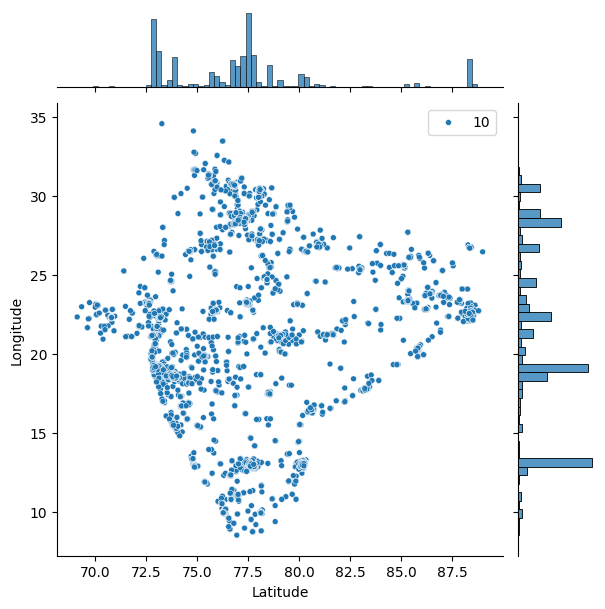

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [21]:
plt.figure(figsize=(10, 10))
sns.jointplot(x = orig_data.LATITUDE.values, y=orig_data.LONGITUDE.values, size = 10)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()
sns.despine

There it is. The scatter plot now shows the data about houses in India

In [22]:
orig_data["CITY"] = orig_data["ADDRESS"].str.split(',').str[-1]
orig_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata


In [23]:
orig_data["CITY"].value_counts()

CITY
Bangalore      4141
Lalitpur       2963
Mumbai         1984
Pune           1974
Noida          1715
               ... 
Nagaur            1
Palanpur          1
Bhadrak           1
Kurukshetra       1
Washim            1
Name: count, Length: 250, dtype: int64

In [24]:
city_count = orig_data["CITY"].value_counts()
cities_to_keep = city_count[city_count>=300].index
data = orig_data[orig_data["CITY"].isin(cities_to_keep)]

I choose to select only those cities taht have count greaater than 300. This decision is based on the availability of dense data points in those cities

In [25]:
data["CITY"].value_counts()

CITY
Bangalore      4141
Lalitpur       2963
Mumbai         1984
Pune           1974
Noida          1715
Kolkata        1673
Maharashtra    1571
Chennai        1230
Ghaziabad      1070
Jaipur          944
Chandigarh      660
Faridabad       625
Mohali          533
Vadodara        508
Gurgaon         419
Surat           418
Nagpur          331
Lucknow         319
Name: count, dtype: int64

##### Cities belonging to respective states
Maharashtra
<ul>
<li>Mumbai:  1</li>
<li>Pune: = 1</li>
<li>Nagpur:  3</li>
</ul>
Uttar Pradesh
<ul>
<li>Lalitpur:  3</li>
<li>Noida:  2</li>
<li>Ghaziabad: - 2</li>
<li>Lucknow: - 3</li>
</ul>
Haryana
<ul>
<li>Gurgaon: - 2</li>
<li>Faridabad: - 2</li>
</ul>
Gujarat
<ul>
<li>Vadodara: - 2</li>
<li>Surat: - 2</li>
</ul>
Punjab
<ul>
<li>Mohali: Tier 3</li>
</ul> 
Madhya Pradesh
<ul>
<li>Indore: Tier 3</li>
</ul> 
Karnataka
<ul>
<li>Bangalore: Tier 1</li>
</ul>
Tamil Nadu
<ul>
<li>Chennai: Tier 1</li>
</ul>
Rajasthan
<ul>
<li>Jaipur: Tier 2</li>
</ul>
Bengal
<ul>
<li>Kolkata: Tier 1</li>
</ul>
Union Territory
<ul>
<li>Chandigarh: Tier 2</li>
</ul>

In [26]:
data.describe()

,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE
count,23078.000000,23078.000000,23078.000000,2.307800e+04,23078.000000,23078.000000,23078.000000,23078.000000,23078.000000
mean,0.188405,0.359910,2.402071,2.474637e+04,0.811595,0.925427,21.084738,77.018982,163.647066
std,0.391043,0.479984,0.858902,2.147843e+06,0.391043,0.262707,5.825952,3.978866,717.870216
min,0.000000,0.000000,1.000000,5.000000e+00,0.000000,0.000000,9.182037,69.323994,0.480000
25%,0.000000,0.000000,2.000000,9.000321e+02,1.000000,1.000000,18.496670,73.741300,43.500000
50%,0.000000,0.000000,2.000000,1.174947e+03,1.000000,1.000000,19.255098,77.338956,70.000000
75%,0.000000,1.000000,3.000000,1.571583e+03,1.000000,1.000000,26.900926,77.700639,120.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,34.552275,88.995434,30000.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23078 entries, 0 to 29450
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           23078 non-null  object 
 1   UNDER_CONSTRUCTION  23078 non-null  int64  
 2   RERA                23078 non-null  int64  
 3   NUM_ROOMS           23078 non-null  int64  
 4   BHK_OR_RK           23078 non-null  object 
 5   SQUARE_FT           23078 non-null  float64
 6   READY_TO_MOVE       23078 non-null  int64  
 7   RESALE              23078 non-null  int64  
 8   ADDRESS             23078 non-null  object 
 9   LONGITUDE           23078 non-null  float64
 10  LATITUDE            23078 non-null  float64
 11  PRICE               23078 non-null  float64
 12  CITY                23078 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 2.5+ MB


In [28]:
data.POSTED_BY.value_counts()

POSTED_BY
Dealer     16140
Owner       6538
Builder      400
Name: count, dtype: int64

In [29]:
data["NUM_ROOMS"].value_counts()

NUM_ROOMS
2     10312
3      8305
1      2774
4      1471
5       150
6        41
7         8
8         7
9         2
15        2
10        2
13        1
17        1
12        1
20        1
Name: count, dtype: int64

In [30]:
data = data[data["NUM_ROOMS"]<5]

In [31]:
data.describe()

,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE
count,22862.000000,22862.000000,22862.000000,2.286200e+04,22862.000000,22862.000000,22862.000000,22862.000000,22862.000000
mean,0.189441,0.361473,2.370615,2.493674e+04,0.810559,0.925247,21.079903,77.019584,157.395599
std,0.391867,0.480438,0.777589,2.157965e+06,0.391867,0.262998,5.830846,3.974702,708.915328
min,0.000000,0.000000,1.000000,5.000000e+00,0.000000,0.000000,9.182037,69.323994,0.480000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,18.496670,73.741300,43.000000
50%,0.000000,0.000000,2.000000,1.170047e+03,1.000000,1.000000,19.255098,77.338956,70.000000
75%,0.000000,1.000000,3.000000,1.554340e+03,1.000000,1.000000,26.900926,77.700727,120.000000
max,1.000000,1.000000,4.000000,2.545455e+08,1.000000,1.000000,34.552275,88.995434,30000.000000


In [32]:
data[(data["BHK_OR_RK"] == "BHK") & (data["SQUARE_FT"]<400)]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,CITY
48,Builder,1,1,1,BHK,301.917116,0,0,"Taloja,Lalitpur",24.690280,78.418890,26.3,Lalitpur
128,Owner,0,1,2,BHK,398.262129,1,1,"Purseni,Lucknow",26.707154,80.982346,11.0,Lucknow
167,Dealer,1,1,1,BHK,265.003393,0,1,"Andheri (East),Lalitpur",19.114500,72.871200,82.0,Lalitpur
230,Builder,1,0,1,BHK,300.026089,0,0,"Kachimet,Lalitpur",24.690280,78.418890,11.5,Lalitpur
507,Dealer,1,1,1,BHK,389.558589,0,0,"Goregaon (West),Mumbai",19.161955,72.839616,87.9,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28839,Dealer,1,1,1,BHK,367.286520,0,1,"New Panvel,Mumbai",18.966114,73.148278,39.7,Mumbai
28861,Dealer,0,0,1,BHK,380.054728,1,1,"Sector-63 Chandigarh,Chandigarh",30.735280,76.791110,25.0,Chandigarh
29080,Dealer,1,1,1,BHK,350.083481,0,0,"Hiranandani Gardens - Powai,Lalitpur",19.124896,72.893503,130.0,Lalitpur
29171,Builder,1,1,1,BHK,397.427441,0,0,"Charholi Budruk,Lalitpur",18.655870,73.893690,24.1,Lalitpur


In [33]:
data[(data["BHK_OR_RK"] == "BHK") & (data["SQUARE_FT"]>500)]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5,Jaipur
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29443,Dealer,0,1,3,BHK,1161.194975,1,1,"Marol,Maharashtra",19.111438,72.878724,220.0,Maharashtra
29444,Dealer,1,1,1,BHK,752.049334,0,1,"Mulund (West),Mumbai",19.175900,72.952200,100.0,Mumbai
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai


Since there is imbalance in the number of houses with a BHK and RK (where the number of houses with RK is extremely less), I cgose to remove the records for house with RK

In [34]:
data = data[data["BHK_OR_RK"]!="RK"]

In the following few cells, I extracted the names of the cities on the basis of neighbourhood. This is done only for those datapoints where the name of the city should actually be a city, but instead it had the name of the state. So i decided to rename the names of the cities based on the neighbourhood cities (as in the cities present in the state)

In [35]:
data["NEIGHBOURHOOD"] = data["ADDRESS"].str.split(',').str[-2]
data[data["CITY"] == "Maharashtra"]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,CITY,NEIGHBOURHOOD
34,Dealer,0,1,2,BHK,857.786197,1,0,"Mulund (West),Maharashtra",19.175900,72.952200,240.0,Maharashtra,Mulund (West)
54,Dealer,1,1,1,BHK,406.024219,0,0,"Kalyan (West),Maharashtra",19.245347,73.124577,39.9,Maharashtra,Kalyan (West)
80,Dealer,0,0,3,BHK,767.018217,1,1,"DN Nagar,Maharashtra",20.742166,80.104602,240.0,Maharashtra,DN Nagar
93,Dealer,1,1,4,BHK,1725.490196,0,0,"Deonar,Maharashtra",19.049513,72.919204,440.0,Maharashtra,Deonar
101,Dealer,0,0,2,BHK,1155.020213,1,1,"Bhandup (West),Maharashtra",19.147866,72.932609,140.0,Maharashtra,Bhandup (West)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29330,Dealer,0,0,2,BHK,936.020262,1,1,"Powai,Maharashtra",19.120000,72.910000,170.0,Maharashtra,Powai
29356,Dealer,0,1,2,BHK,801.011804,1,1,"Balkum,Maharashtra",19.222101,72.988231,95.0,Maharashtra,Balkum
29372,Dealer,0,0,3,BHK,15029.522280,1,1,"Kanjur Marg (East),Maharashtra",18.960000,72.820000,280.0,Maharashtra,Kanjur Marg (East)
29400,Dealer,1,1,2,BHK,511.555677,0,0,"Anjurdive,Maharashtra",18.960000,72.820000,56.0,Maharashtra,Anjurdive


In [36]:
data[data["CITY"].isin(["Pune", "Mumbai", "Nagpur"])]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,CITY,NEIGHBOURHOOD
21,Dealer,0,0,2,BHK,944.881890,1,1,"Undri,Pune",18.452663,73.931040,42.0,Pune,Undri
23,Dealer,0,0,1,BHK,630.000630,1,1,"Bandra (West),Mumbai",19.054440,72.840560,300.0,Mumbai,Bandra (West)
24,Dealer,0,0,2,BHK,1219.809710,1,1,"Narendra Nagar,Nagpur",21.105779,79.078497,50.0,Nagpur,Narendra Nagar
36,Dealer,1,1,2,BHK,1020.087884,0,1,"Wakad,Pune",18.599300,73.762500,65.0,Pune,Wakad
41,Dealer,0,1,2,BHK,1058.114928,1,1,"Sus,Pune",18.539812,73.737678,65.0,Pune,Sus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29411,Dealer,0,0,4,BHK,2843.973718,1,1,"Pashan,Pune",18.544200,73.794800,290.0,Pune,Pashan
29417,Dealer,1,1,2,BHK,656.628376,0,1,"Wagholi,Pune",18.582300,73.983000,42.3,Pune,Wagholi
29418,Dealer,1,0,1,BHK,583.022388,0,1,"Mulund (West),Mumbai",19.175900,72.952200,75.0,Mumbai,Mulund (West)
29422,Owner,0,0,2,BHK,646.987465,1,1,"Buti Bori,Nagpur",21.000000,79.000000,16.0,Nagpur,Buti Bori


In [37]:
neighbourhood_data = data[data["CITY"].isin(["Pune", "Mumbai", "Nagpur"])]

In [38]:
orig_data["NEIGHBOURHOOD"] = orig_data["ADDRESS"].str.split(',').str[-2]
orig_data = orig_data[orig_data["CITY"] != "Maharashtra"]

In [39]:
orig_data[orig_data["CITY"] == "Maharashtra"]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,CITY,NEIGHBOURHOOD


In [40]:
# test_data["NEIGHBOURHOOD"] = test_data["ADDRESS"].str.split(',').str[-2]
# test_data_copy = test_data[test_data["CITY"] != "Maharashtra"]
# neighbourhood = {}
# for index, row in test_data_copy.iterrows():
#     city = row["CITY"]
#     neighbour = row["NEIGHBOURHOOD"]
#     if city in neighbourhood:
#         neighbourhood[city].append(neighbour)
#     else: 
#         neighbourhood[city] = [neighbour]
# print(neighbourhood)

# state_rows = data[data['CITY'].str.lower() == "maharashtra"]

# # Step 2: Find matching rows with valid city names and same neighbourhood
# corrected_cities = []
# for index, row in state_rows.iterrows():
#     neighbour_hood = row['NEIGHBOURHOOD'].lower()
#     valid_cities = []
#     for city, neighbours in neighbourhood.items():
#         if neighbour_hood in [neighbour.lower() for neighbour in neighbours]:
#             valid_cities.append(city)
#     if valid_cities:
#         corrected_cities.append((index, valid_cities[0]))

# # Step 3: Replace state names with valid city names
# for index, city in corrected_cities:
#     test_data.at[index, 'CITY'] = city

In [41]:
neighbourhood = {}
for index, row in orig_data.iterrows():
    city = row["CITY"]
    neighbour = row["NEIGHBOURHOOD"]
    if city in neighbourhood:
        neighbourhood[city].append(neighbour)
    else: 
        neighbourhood[city] = [neighbour]
print(neighbourhood)

{'Bangalore': ['Ksfc Layout', 'Jigani', 'Bileshivale', 'Hebbal', 'Garebhavipalya', 'Konanakunte', 'Kogilu', 'Vasanthapura', 'Basaveshwara Nagar', 'Yelahanka', 'Wilson Garden', 'CV Raman Nagar', 'Basapura', 'Ananth Nagar', 'Dodda Banaswadi', 'Electronics City Phase 1', 'Chandapura', 'Kaggadasapura', 'JP Nagar', 'Syndicate Bank Colony', 'Rasanna Colony', 'Budigere', 'Doddakannelli', 'Ferrar Nagar', 'Konanakunte', 'Roopena Agrahara', 'Suraksha Nagar', 'Kadugodi', 'Sarjapur Road', 'Electronic City Phase II', 'Suraksha Nagar', 'Harlur Road', 'Byagadadhenahalli', 'Doddakallasandra', 'Bhuvaneshwari Nagar', 'Aga Abbas Ali Road', 'Rajarajeshwari Nagar', 'Iblur Village', 'Thanisandra', 'Banashankari Stage VI', 'Kadugodi', 'Mysore Road', 'Chandapura', 'Kathreguppe', 'BTM 1st Stage', 'Mylasandra', 'Sathya Sai Layout', 'Nehru Nagar', 'Bandepalya', 'Devanahalli', 'KR Puram', 'Binny Pete', 'Kengeri', 'Udaya Nagar', 'Hennur Road', 'Kodigehalli', 'KR Puram', 'Phase 1 Kammasandra', 'Nagavarapalya', 'Dod

In [42]:
state_rows = data[data['CITY'].str.lower() == "maharashtra"]

# Step 2: Find matching rows with valid city names and same neighbourhood
corrected_cities = []
for index, row in state_rows.iterrows():
    neighbour_hood = row['NEIGHBOURHOOD'].lower()
    valid_cities = []
    for city, neighbours in neighbourhood.items():
        if neighbour_hood in [neighbour.lower() for neighbour in neighbours]:
            valid_cities.append(city)
    if valid_cities:
        corrected_cities.append((index, valid_cities[0]))

# Step 3: Replace state names with valid city names
for index, city in corrected_cities:
    data.at[index, 'CITY'] = city

In [43]:
print("Number of remaining records after renaming the cities based on their neighbourhood", data[data["CITY"] == "Maharashtra"].shape[0])
data[data["CITY"] == "Maharashtra"]

Number of remaining records after renaming the cities based on their neighbourhood 62


,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,CITY,NEIGHBOURHOOD
922,Dealer,0,0,2,BHK,1199.982546,1,1,"SEAFACE CARTER ROAD,Maharashtra",18.960000,72.820000,550.0,Maharashtra,SEAFACE CARTER ROAD
1060,Dealer,0,0,2,BHK,820.016821,1,1,"Diva East,Maharashtra",19.186352,73.046893,39.0,Maharashtra,Diva East
1245,Dealer,0,0,2,BHK,950.035187,1,1,"Sriprastha,Maharashtra",18.960000,72.820000,54.0,Maharashtra,Sriprastha
2129,Dealer,0,0,2,BHK,1100.000000,1,1,"near bandstand,Maharashtra",18.960000,72.820000,275.0,Maharashtra,near bandstand
2289,Dealer,0,0,2,BHK,1211.895218,1,1,"Vallabh Nagar,Maharashtra",18.616490,73.818299,390.0,Maharashtra,Vallabh Nagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26545,Dealer,0,0,2,BHK,923.421938,1,1,"Kandarpada,Maharashtra",19.259463,72.852927,140.0,Maharashtra,Kandarpada
27763,Dealer,0,0,2,BHK,1050.013816,1,1,"Ram Maruti Road,Maharashtra",21.126159,79.127760,190.0,Maharashtra,Ram Maruti Road
28526,Dealer,0,0,4,BHK,3470.006828,1,1,"Jvpd Scheme,Maharashtra",18.960000,72.820000,3100.0,Maharashtra,Jvpd Scheme
28624,Dealer,0,0,1,BHK,740.028832,1,1,"Sector 19A Nerul,Maharashtra",19.028496,73.319284,77.0,Maharashtra,Sector 19A Nerul


In [44]:
# Removing the remaining records left without renaming the city
data = data[data["CITY"] != "Maharashtra"]
data[data["CITY"] == "Maharashtra"]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,CITY,NEIGHBOURHOOD


In [45]:
data.rename(columns={"BHK_NO.": "NUM_ROOMS", "TARGET(PRICE_IN_LACS)":"PRICE"},  inplace=True)

In [46]:
data["CITY"].value_counts()

CITY
Bangalore     4115
Mumbai        3300
Lalitpur      2973
Pune          1985
Noida         1693
Kolkata       1656
Chennai       1225
Ghaziabad     1067
Jaipur         963
Chandigarh     657
Faridabad      622
Mohali         531
Vadodara       504
Surat          409
Gurgaon        405
Nagpur         341
Lucknow        317
Raigad           6
Kolhapur         2
Sindhudurg       2
Aurangabad       2
Jamnagar         1
Name: count, dtype: int64

In [47]:
# city_count = orig_data["CITY"].value_counts()
# cities_to_keep = city_count[city_count>=400].index
data = data[data["CITY"].isin(cities_to_keep)]

In [48]:
num_cols = ["SQUARE_FT", 'PRICE', "NUM_ROOMS", "AVG_SQFT_PER_ROOM"]

In [49]:
data.describe()

,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE
count,22763.000000,22763.000000,22763.000000,2.276300e+04,22763.000000,22763.000000,22763.000000,22763.000000,22763.000000
mean,0.189167,0.361683,2.373984,2.504180e+04,0.810833,0.925932,21.084064,77.030920,157.445103
std,0.391650,0.480498,0.776185,2.162652e+06,0.391650,0.261887,5.841008,3.976382,710.071279
min,0.000000,0.000000,1.000000,5.000000e+00,0.000000,0.000000,9.182037,69.323994,0.480000
25%,0.000000,0.000000,2.000000,9.000201e+02,1.000000,1.000000,18.496129,73.741300,43.000000
50%,0.000000,0.000000,2.000000,1.170275e+03,1.000000,1.000000,19.256471,77.339935,70.000000
75%,0.000000,1.000000,3.000000,1.556341e+03,1.000000,1.000000,26.900926,77.701940,120.000000
max,1.000000,1.000000,4.000000,2.545455e+08,1.000000,1.000000,34.552275,88.995434,30000.000000


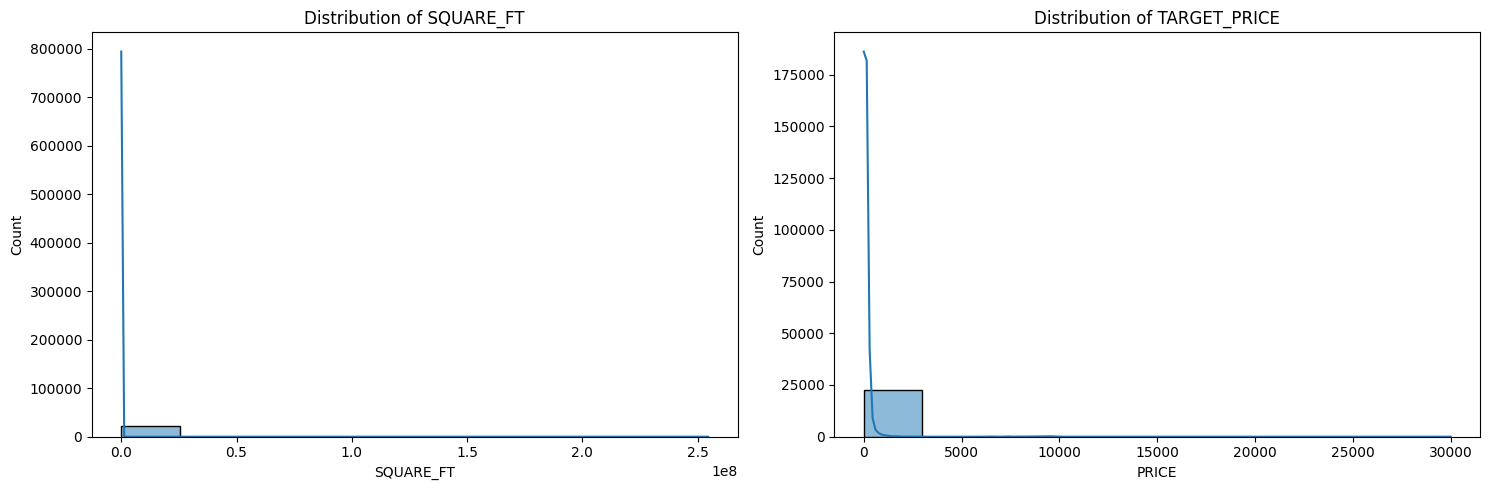

In [50]:
plt.figure(figsize=(15, 5))
# Distribution of log-transformed SQUARE_FT
plt.subplot(1, 2, 1)
sns.histplot(data['SQUARE_FT'], bins=10, kde=True)
plt.title('Distribution of SQUARE_FT')

# Distribution of log-transformed TARGET_PRICE
plt.subplot(1, 2, 2)
sns.histplot(data['PRICE'], bins=10, kde=True)
plt.title('Distribution of TARGET_PRICE')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of NUM_ROOMS')

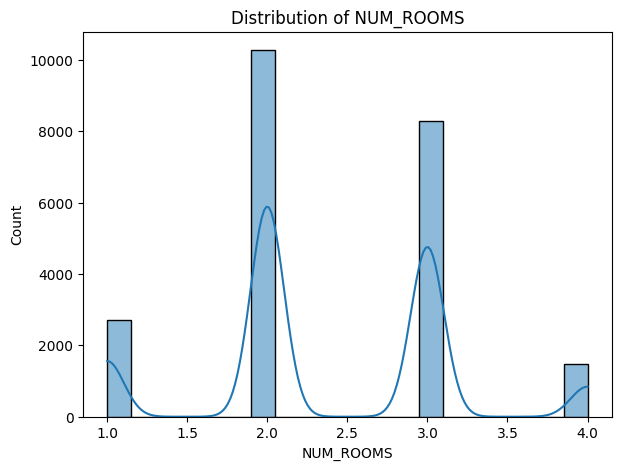

In [51]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['NUM_ROOMS'], bins=20, kde=True)
plt.title('Distribution of NUM_ROOMS')

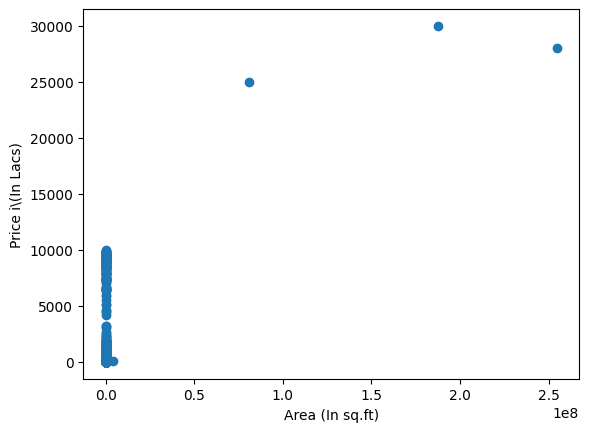

In [52]:
plt.scatter(data["SQUARE_FT"], data["PRICE"])
plt.xlabel("Area (In sq.ft)")
plt.ylabel("Price i\(In Lacs)")
plt.show()

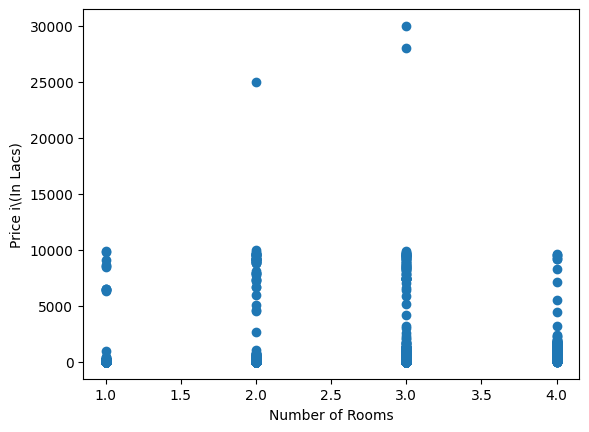

In [53]:
plt.scatter(data["NUM_ROOMS"], data["PRICE"])
plt.xlabel("Number of Rooms")
plt.ylabel("Price i\(In Lacs)")
plt.show()

Based on the above two visualization, it is clear that price contain some very extreme values

In [54]:
# data = data[data["PRICE"]<10500]
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,CITY,NEIGHBOURHOOD
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,Ksfc Layout
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,Jigani
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,Sector-1 Vaishali
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,New Town
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5,Jaipur,Sodala


In [55]:
# from scipy.stats.mstats import winsorize
# from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame containing the dataset

# Winsorize the SQUARE_FT and PRICE columns
# Calculate the IQR for SQUARE_FT and TARGET_PRICE
Q1 = data[['SQUARE_FT', 'PRICE']].quantile(0.25)
Q3 = data[['SQUARE_FT', 'PRICE']].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Detect outliers
outliers = ((data[['SQUARE_FT', 'PRICE']] < (Q1 - threshold * IQR)) |
            (data[['SQUARE_FT', 'PRICE']] > (Q3 + threshold * IQR)))

# Filter out rows containing outliers
cleaned_data = data[~outliers.any(axis=1)]

# Print the number of outliers detected
print("Number of outliers detected and removed:")
print(outliers.sum())

# Normalize the features using Min-Max scaling
# scaler = MinMaxScaler()
data[['SQUARE_FT', 'PRICE']] = np.log(data[['SQUARE_FT', 'PRICE']])


Number of outliers detected and removed:
SQUARE_FT    1197
PRICE        2042
dtype: int64


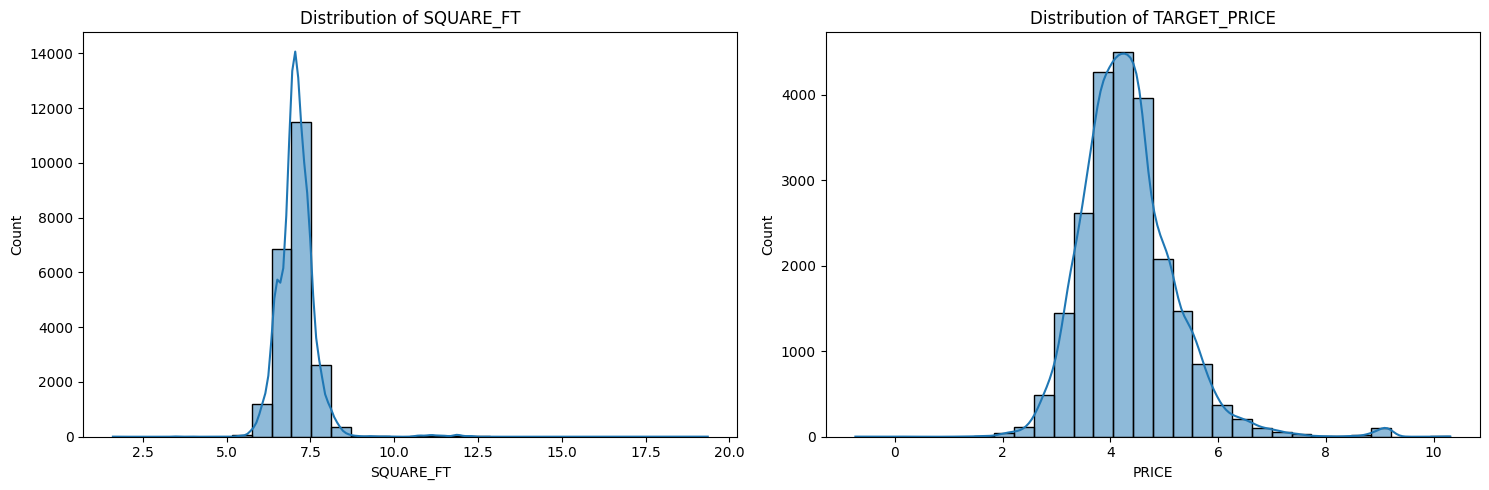

In [56]:
plt.figure(figsize=(15, 5))
# Distribution of log-transformed SQUARE_FT
plt.subplot(1, 2, 1)
sns.histplot(data['SQUARE_FT'], bins=30, kde=True)
plt.title('Distribution of SQUARE_FT')

# Distribution of log-transformed TARGET_PRICE
plt.subplot(1, 2, 2)
sns.histplot(data['PRICE'], bins=30, kde=True)
plt.title('Distribution of TARGET_PRICE')

plt.tight_layout()
plt.show()

Both the features seem to be normalized but there still exists some amount of noise which can be removed manually

In [57]:
data = data[((data["PRICE"]>1) & (data["PRICE"]<=8)) & ((data["SQUARE_FT"]>5) & (data["SQUARE_FT"]<=9))]

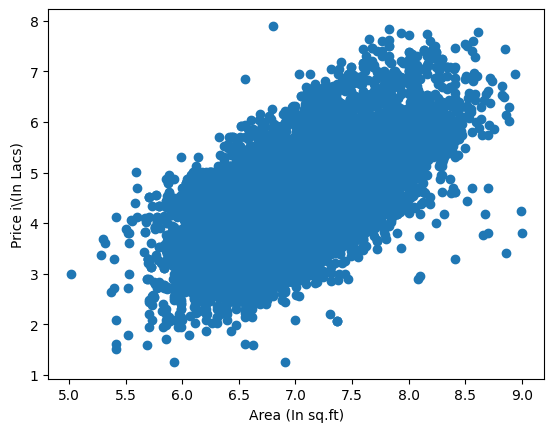

In [58]:
plt.scatter(data["SQUARE_FT"], data["PRICE"])
plt.xlabel("Area (In sq.ft)")
plt.ylabel("Price i\(In Lacs)")
plt.show()

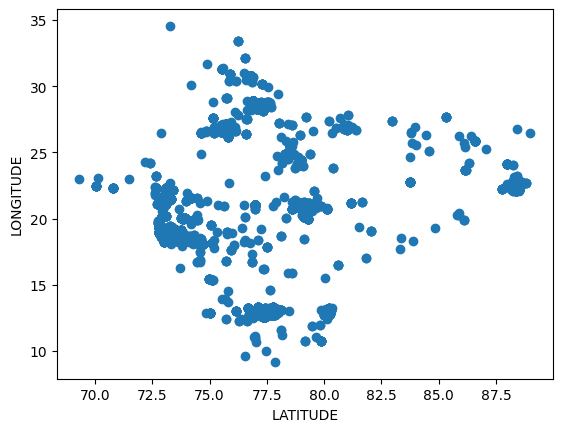

In [59]:
plt.scatter(data["LATITUDE"], data["LONGITUDE"])
plt.xlabel("LATITUDE")
plt.ylabel("LONGITUDE")
plt.show()

In [60]:
# def get_latitude_hemisphere(lat):
#     if lat >= 0:
#         return "North"
#     else:
#         return "South"
    
# def get_longitude_hemisphere(long):
#     if long >= 0:
#         return "East"
#     else: 
#         return "West"

In [61]:
# Calculate average square footage per room
data["AVG_SQFT_PER_ROOM"] = data["SQUARE_FT"] / data["NUM_ROOMS"]
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,CITY,NEIGHBOURHOOD,AVG_SQFT_PER_ROOM
0,Owner,0,0,2,BHK,7.170301,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,4.007333,Bangalore,Ksfc Layout,3.585151
2,Owner,0,0,2,BHK,6.838576,1,1,"Jigani,Bangalore",12.778033,77.632191,3.761200,Bangalore,Jigani,3.419288
3,Owner,0,1,2,BHK,6.835100,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,4.135167,Ghaziabad,Sector-1 Vaishali,3.417550
4,Dealer,1,0,2,BHK,6.906764,0,1,"New Town,Kolkata",22.592200,88.484911,4.102643,Kolkata,New Town,3.453382
6,Dealer,0,0,3,BHK,7.309918,1,1,"Sodala,Jaipur",26.916347,75.795600,4.197202,Jaipur,Sodala,2.436639


Text(0.5, 1.0, 'Distribution of AVG_SQFT_PER_ROOM')

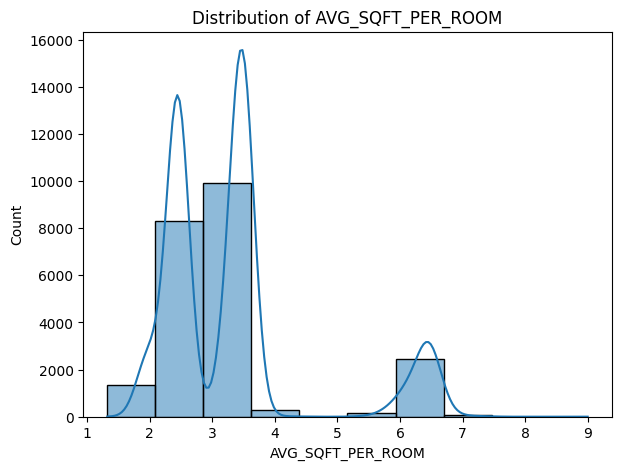

In [62]:
plt.figure(figsize=(15, 5))
# Distribution of log-transformed SQUARE_FT
plt.subplot(1, 2, 1)
sns.histplot(data['AVG_SQFT_PER_ROOM'], bins=10, kde=True)
plt.title('Distribution of AVG_SQFT_PER_ROOM')


In [63]:
data.describe()

,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE,AVG_SQFT_PER_ROOM
count,22592.000000,22592.000000,22592.000000,22592.000000,22592.000000,22592.000000,22592.000000,22592.000000,22592.000000,22592.000000
mean,0.187323,0.359773,2.373274,7.061322,0.812677,0.930816,21.086238,77.035160,4.303867,3.338531
std,0.390179,0.479944,0.775869,0.455371,0.390179,0.253772,5.839958,3.981210,0.799415,1.234801
min,0.000000,0.000000,1.000000,5.015246,0.000000,0.000000,9.182037,69.323994,1.252763,1.324579
25%,0.000000,0.000000,2.000000,6.802395,1.000000,1.000000,18.496129,73.741300,3.761200,2.450194
50%,0.000000,0.000000,2.000000,7.062567,1.000000,1.000000,19.256471,77.340868,4.248495,3.342306
75%,0.000000,1.000000,3.000000,7.346000,1.000000,1.000000,26.900926,77.701940,4.787492,3.522942
max,1.000000,1.000000,4.000000,8.998820,1.000000,1.000000,34.552275,88.995434,7.901007,8.996158


In [64]:
data["CITY"].unique()

array(['Bangalore', 'Ghaziabad', 'Kolkata', 'Jaipur', 'Mohali', 'Chennai',
       'Noida', 'Pune', 'Mumbai', 'Nagpur', 'Faridabad', 'Lalitpur',
       'Vadodara', 'Lucknow', 'Gurgaon', 'Surat', 'Chandigarh'],
      dtype=object)

In [65]:
# Define the list of cities
cities = ['Bangalore', 'Ghaziabad', 'Kolkata', 'Jaipur', 'Mohali', 'Chennai',
       'Noida', 'Pune', 'Mumbai', 'Nagpur', 'Faridabad', 'Lalitpur',
       'Vadodara', 'Lucknow', 'Gurgaon', 'Indore', 'Surat', 'Chandigarh']

# Dictionary mapping cities to tiers
city_tiers = {
    'Bangalore': '1',
    'Ghaziabad': '2',
    'Kolkata': '1',
    'Jaipur': '2',
    'Mohali': '3',
    'Chennai': '1',
    'Noida': '2',
    'Pune': '1',
    'Mumbai': '1',
    'Nagpur': '2',
    'Faridabad': '2',
    'Lalitpur': '3',
    'Vadodara': '2',
    'Lucknow': '2',
    'Gurgaon': '1',
    'Indore': '2',
    'Surat': '2',
    'Chandigarh': '1'
}

# Create a new column 'City_Tier' in your DataFrame
data['CITY_TIER'] = data['CITY'].map(city_tiers)
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,PRICE,CITY,NEIGHBOURHOOD,AVG_SQFT_PER_ROOM,CITY_TIER
0,Owner,0,0,2,BHK,7.170301,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,4.007333,Bangalore,Ksfc Layout,3.585151,1
2,Owner,0,0,2,BHK,6.838576,1,1,"Jigani,Bangalore",12.778033,77.632191,3.761200,Bangalore,Jigani,3.419288,1
3,Owner,0,1,2,BHK,6.835100,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,4.135167,Ghaziabad,Sector-1 Vaishali,3.417550,2
4,Dealer,1,0,2,BHK,6.906764,0,1,"New Town,Kolkata",22.592200,88.484911,4.102643,Kolkata,New Town,3.453382,1
6,Dealer,0,0,3,BHK,7.309918,1,1,"Sodala,Jaipur",26.916347,75.795600,4.197202,Jaipur,Sodala,2.436639,2


Neighbourhood's work done. Time to remove it along with Address and BHK_or_RK

In [66]:
data = data.drop(columns=["ADDRESS", "BHK_OR_RK", "NEIGHBOURHOOD", "UNDER_CONSTRUCTION"], axis=1)

In [67]:
data.head()

,POSTED_BY,RERA,NUM_ROOMS,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE,CITY,AVG_SQFT_PER_ROOM,CITY_TIER
0,Owner,0,2,7.170301,1,1,12.969910,77.597960,4.007333,Bangalore,3.585151,1
2,Owner,0,2,6.838576,1,1,12.778033,77.632191,3.761200,Bangalore,3.419288,1
3,Owner,1,2,6.835100,1,1,28.642300,77.344500,4.135167,Ghaziabad,3.417550,2
4,Dealer,0,2,6.906764,0,1,22.592200,88.484911,4.102643,Kolkata,3.453382,1
6,Dealer,0,3,7.309918,1,1,26.916347,75.795600,4.197202,Jaipur,2.436639,2


### Feature Transformation

Converting categorical values into numerical format

Since the price of the house varies with the change in cities, cities can be encoded in a ranked format

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
city_encoder = LabelEncoder()
data["CITY"] = city_encoder.fit_transform(data["CITY"])

In [69]:
with open('city_encoder.pkl', 'wb') as f:
    joblib.dump(city_encoder, f)

In [70]:
city_encoder.classes_

array(['Bangalore', 'Chandigarh', 'Chennai', 'Faridabad', 'Ghaziabad',
       'Gurgaon', 'Jaipur', 'Kolkata', 'Lalitpur', 'Lucknow', 'Mohali',
       'Mumbai', 'Nagpur', 'Noida', 'Pune', 'Surat', 'Vadodara'],
      dtype=object)

In [71]:
data = pd.get_dummies(data=data, columns=["POSTED_BY"], dtype="int64")
data.head()

,RERA,NUM_ROOMS,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE,CITY,AVG_SQFT_PER_ROOM,CITY_TIER,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,2,7.170301,1,1,12.969910,77.597960,4.007333,0,3.585151,1,0,0,1
2,0,2,6.838576,1,1,12.778033,77.632191,3.761200,0,3.419288,1,0,0,1
3,1,2,6.835100,1,1,28.642300,77.344500,4.135167,4,3.417550,2,0,0,1
4,0,2,6.906764,0,1,22.592200,88.484911,4.102643,7,3.453382,1,0,1,0
6,0,3,7.309918,1,1,26.916347,75.795600,4.197202,6,2.436639,2,0,1,0


In [72]:
data.corr()

,RERA,NUM_ROOMS,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,PRICE,CITY,AVG_SQFT_PER_ROOM,CITY_TIER,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
RERA,1.000000,0.024967,-0.012031,-0.384929,-0.261920,0.126440,-0.221340,0.102216,0.115253,-0.015386,0.103375,0.095495,0.207285,-0.237450
NUM_ROOMS,0.024967,1.000000,0.825759,0.059906,0.012236,0.090025,0.114019,0.514306,-0.135372,-0.899713,-0.054314,-0.025538,0.076336,-0.070419
SQUARE_FT,-0.012031,0.825759,1.000000,0.151971,0.147123,0.065057,0.051874,0.573246,-0.146935,-0.700695,-0.049414,-0.066306,0.093793,-0.076727
READY_TO_MOVE,-0.384929,0.059906,0.151971,1.000000,0.349689,-0.013944,0.067893,-0.015974,-0.076485,-0.050804,-0.028269,-0.170839,-0.155103,0.205547
RESALE,-0.261920,0.012236,0.147123,0.349689,1.000000,0.017865,0.048603,-0.007921,-0.025907,-0.013266,0.014490,-0.467148,-0.040532,0.172210
LONGITUDE,0.126440,0.090025,0.065057,-0.013944,0.017865,1.000000,0.073903,-0.156228,0.354075,-0.062395,0.482201,-0.028762,0.087212,-0.080568
LATITUDE,-0.221340,0.114019,0.051874,0.067893,0.048603,0.073903,1.000000,-0.231064,-0.331659,-0.150171,-0.163330,0.014159,-0.161136,0.159794
PRICE,0.102216,0.514306,0.573246,-0.015974,-0.007921,-0.156228,-0.231064,1.000000,0.032404,-0.410374,0.009364,-0.077417,0.333781,-0.317515
CITY,0.115253,-0.135372,-0.146935,-0.076485,-0.025907,0.354075,-0.331659,0.032404,1.000000,0.152442,0.230910,-0.008628,0.143616,-0.143540
AVG_SQFT_PER_ROOM,-0.015386,-0.899713,-0.700695,-0.050804,-0.013266,-0.062395,-0.150171,-0.410374,0.152442,1.000000,0.072403,0.014736,-0.031385,0.027765


I choose a threshold for feature selsection as 1%, meaning if the correlation between the dependent and independent values are less than one percent that independent variable will be removed

In [73]:
data.columns

Index(['RERA', 'NUM_ROOMS', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE',
       'LONGITUDE', 'LATITUDE', 'PRICE', 'CITY', 'AVG_SQFT_PER_ROOM',
       'CITY_TIER', 'POSTED_BY_Builder', 'POSTED_BY_Dealer',
       'POSTED_BY_Owner'],
      dtype='object')

In [74]:
cleaned_data = data.drop(columns=["CITY_TIER", "RESALE"], axis=1)

### Selecting the dependent and independent variables

In [75]:
x = cleaned_data.drop(columns=["PRICE"], axis=1)
y = cleaned_data["PRICE"]

In [76]:
feature_names = x.columns

### Feature Scaling

In [77]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

In [78]:
# with open('scaler.pkl', 'wb') as f:
#     joblib.dump(min_max_scaler, f)

### Train-test-split

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [80]:
x_train[0]

array([0.        , 0.33333333, 0.5216915 , 1.        , 0.15196176,
       0.42214993, 0.        , 0.28965902, 0.        , 0.        ,
       1.        ])

### Model training and performance evaluation

In [81]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [82]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [83]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=2,
                                 learning_rate=0.01, loss="absolute_error")
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='absolute_error',
                          max_depth=10, n_estimators=400)

In [85]:
gbr.score(x_train, y_train)

0.893327411982623

In [86]:
gbr.score(x_test, y_test)

0.8254584638439861

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Model Score
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Calculate R2
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Adjusted R2
    n = len(y_test)
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    
    return train_score, test_score, mae, rmse, r2, adj_r2

# Assuming you have already trained and tested your models and stored them in variables
# linear_regression_model, decision_tree_model, random_forest_model, gradient_boosting_model

# Evaluate Linear Regression model
train_score_lr, test_score_lr, mae_lr, rmse_lr, r2_lr, adj_r2_lr = evaluate_model(linear, x_test, y_test)

# Evaluate Decision Tree model
train_score_dt, test_score_dt, mae_dt, rmse_dt, r2_dt, adj_r2_dt = evaluate_model(dt, x_test, y_test)

# Evaluate Random Forest model
train_score_rf, test_score_rf, mae_rf, rmse_rf, r2_rf, adj_r2_rf = evaluate_model(rf, x_test, y_test)

# Evaluate Gradient Boosting model
train_score_gb, test_score_gb, mae_gb, rmse_gb, r2_gb, adj_r2_gb = evaluate_model(gbr, x_test, y_test)

# Print the results
print("Linear Regression:")
print("Train score:", train_score_lr)
print("Test Score:", test_score_lr)
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2:", r2_lr)
print("Adjusted R2:", adj_r2_lr)
print()

print("Decision Tree:")
print("Train score:", train_score_dt)
print("Test Score:", test_score_dt)
print("MAE:", mae_dt)
print("RMSE:", rmse_dt)
print("R2:", r2_dt)
print("Adjusted R2:", adj_r2_dt)
print()

print("Random Forest:")
print("Train score:", train_score_rf)
print("Test Score:", test_score_rf)
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)
print("Adjusted R2:", adj_r2_rf)
print()

print("Gradient Boosting:")
print("Train score:", train_score_gb)
print("Test Score:", test_score_gb)
print("MAE:", mae_gb)
print("RMSE:", rmse_gb)
print("R2:", r2_gb)
print("Adjusted R2:", adj_r2_gb)


Linear Regression:
Train score: 0.5221352640707791
Test Score: 0.5166518580078074
MAE: 0.43723180873180884
RMSE: 0.5622705189907118
R2: 0.5166518580078074
Adjusted R2: 0.5158660422286301

Decision Tree:
Train score: 0.9990534417863397
Test Score: 0.725634663068807
MAE: 0.2694857235273521
RMSE: 0.4236233667587012
R2: 0.725634663068807
Adjusted R2: 0.7251886065056614

Random Forest:
Train score: 0.9777398823114786
Test Score: 0.8336101879959367
MAE: 0.2162552707459856
RMSE: 0.329897217045077
R2: 0.8336101879959367
Adjusted R2: 0.8333396754431662

Gradient Boosting:
Train score: 0.893327411982623
Test Score: 0.8254584638439861
MAE: 0.22838862110296135
RMSE: 0.3378817099242798
R2: 0.8254584638439861
Adjusted R2: 0.8251746984142321


### Feature Importance

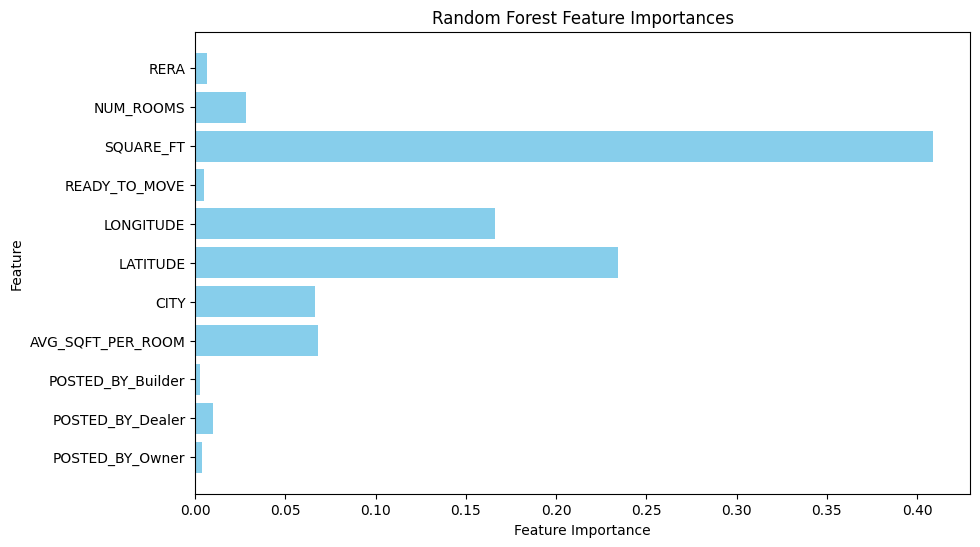

In [141]:
feature_importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

The plot indicates that Square_ft or area of the house ahas most importance followed by latitude, longitude, Avg_sq_per_room, then city and so on...

### Result

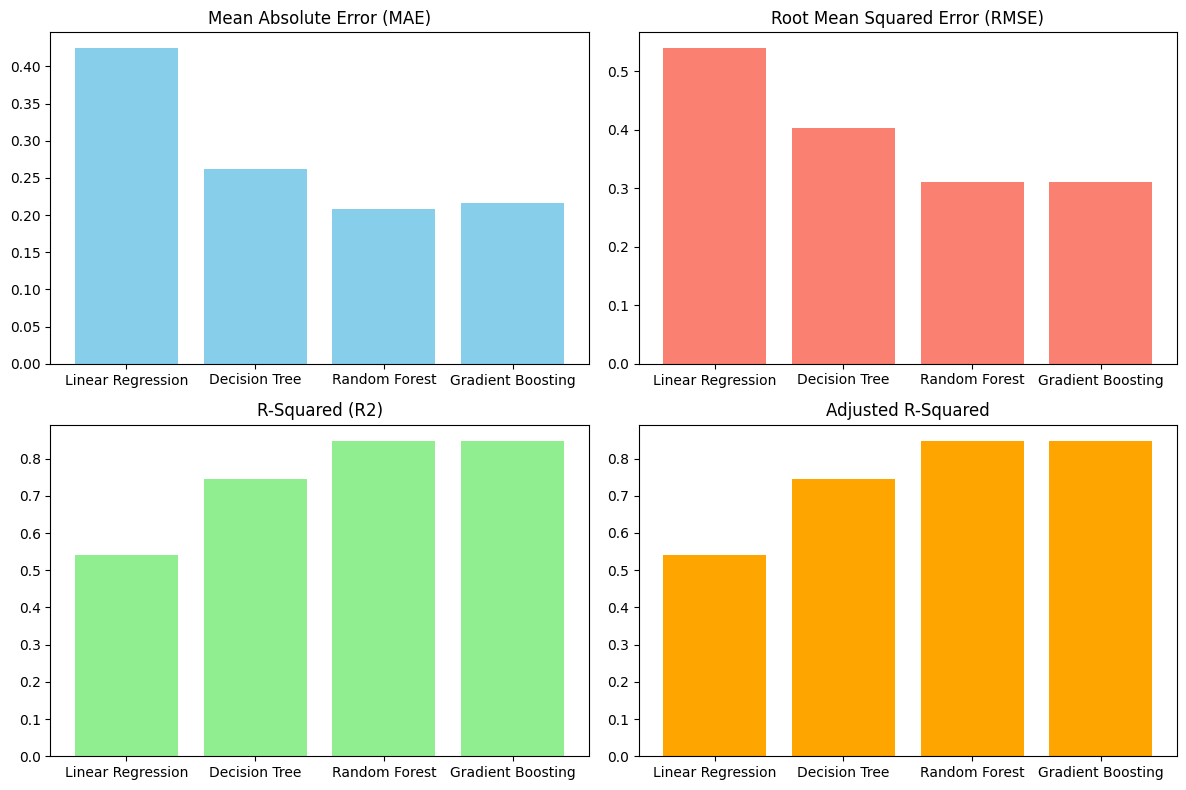

In [142]:
import matplotlib.pyplot as plt

# Define the models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Define the performance metrics
mae = [0.42470794461585704, 0.26180423812375064, 0.20873787646681738, 0.2166193938061788]
rmse = [0.5399273274688607,  0.40258414331424636, 0.31016127349283323, 0.31151675637075577]
r2 = [0.5404760331739156, 0.7445235459875401, 0.8483603785916356, 0.8470320757405027]
adjusted_r2 = [0.5397401526039509, 0.7441144266114829,  0.8481175432683729, 0.8467871132762641]

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].bar(models, mae, color='skyblue')
axs[0, 0].set_title('Mean Absolute Error (MAE)')
axs[0, 1].bar(models, rmse, color='salmon')
axs[0, 1].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].bar(models, r2, color='lightgreen')
axs[1, 0].set_title('R-Squared (R2)')
axs[1, 1].bar(models, adjusted_r2, color='orange')
axs[1, 1].set_title('Adjusted R-Squared')

plt.tight_layout()
plt.show()


Mean Absolute error and Root mean squared error are the two model performance metrics that measures the average difference between the predicted values and the actual values and. While MAE calculates the absolute difference between the predicted and actual output variable, on the other side, RMSE penalizes larger errors more. Lower values indicates better model performance 

R2 and Adjusted R2 measure the proportion of the variance in the dependent variable (house prices) that is predictable from the independent variables. Adjusted R2 adjusts R2 for the number of predictors in the model, providing a more accurate measure of model fit.Higher the r2 and Adjusted values are better.

The above evaluation shows that Random forest regressor had the best performance of all the model. Followed by Random Foest was Gradient boosting method and then Decision tree that performed reasonalby well. Linear Regression performed the worst of all the models

### Conclusion

<li>Model Performance:</li>

Random Forest and Gradient Boosting models outperform Linear Regression and Decision Tree in terms of predictive accuracy and model performance.
Random Forest exhibits the lowest Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and highest R-squared (R2) and Adjusted R-squared (Adjusted R2), indicating superior performance in predicting house prices.
<li>Model Selection:</li>

For the task of house price prediction, Random Forest emerges as the most suitable model due to its superior performance across multiple evaluation metrics.
Gradient Boosting also performs well and can be considered as an alternative to Random Forest.
<li>Recommendation:</li>

We can deploy Random Forest model for real-world applications of house price prediction.
Further refinements and optimizations could be explored to enhance the performance of the deployed model, such as feature engineering, hyperparameter tuning, and ensemble techniques.

<li>Future Directions:</li>

The project could be extended to include additional features or data sources to improve the predictive accuracy of the models.
Continuous monitoring and evaluation of the deployed model's performance are essential to ensure its effectiveness in dynamic real estate markets.

### Saving the random forest model

In [29]:
joblib.dump(dt, 'decision_tree_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(gbr, 'gradient_boost_model.pkl')

### Loading the saved model

In [30]:
model = joblib.load('random_forest_model.pkl')

# Model prediction on test data

In [154]:
test_data = pd.read_csv("test.csv")
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [155]:
test_data["BHK_OR_RK"].value_counts()

BHK_OR_RK
BHK    68662
RK        58
Name: count, dtype: int64

In [156]:
test_data.rename(columns={"BHK_NO.": "NUM_ROOMS"},  inplace=True)

In [157]:
test_data["CITY"] = test_data["ADDRESS"].str.split(',').str[-1]
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,CITY
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,Surat
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,Lalitpur
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,Kolkata
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,Jaipur
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,Nadiad


In [158]:
test_data["CITY"].unique()

array(['Surat', 'Lalitpur', 'Kolkata', 'Jaipur', 'Nadiad', 'Vadodara',
       'Maharashtra', 'Mumbai', 'Lucknow', 'Secunderabad', 'Jodhpur',
       'Faridabad', 'Bangalore', 'Noida', 'Guntur', 'Chandigarh',
       'Kanpur', 'Agra', 'Pune', 'Mohali', 'Kannur', 'Guwahati',
       'Gurgaon', 'Ahmednagar', 'Warangal', 'Meerut', 'Coimbatore',
       'Asansol', 'Jamnagar', 'Vapi', 'Goa', 'Ghaziabad', 'Rajkot',
       'Karnal', 'Nagpur', 'Palghar', 'Chennai', 'Haridwar', 'Siliguri',
       'Bhubaneswar', 'Kochi', 'Ranchi', 'Indore', 'Tumkur', 'Mangalore',
       'Bilaspur', 'Aurangabad', 'Rudrapur', 'Bhandara', 'Jalandhar',
       'Mysore', 'Dharuhera', 'Raigad', 'Visakhapatnam', 'Ludhiana',
       'Ajmer', 'Bhiwadi', 'Ratnagiri', 'Bhopal', 'Raipur', 'Chandrapur',
       'Bharuch', 'Udaipur', 'Gandhinagar', 'Vizianagaram', 'Vijayawada',
       'Kanchipuram', 'Junagadh', 'Kottayam', 'Panchkula', 'Bhilwara',
       'Puri', 'Amritsar', 'Alwar', 'Belgaum', 'Thrissur', 'Sonipat',
       'Khandwa',

In [159]:
states = ["maharashtra", "goa", ]
state_data = [city for city in test_data["CITY"].str.lower() if city in states]

In [160]:
len(state_data)

4103

In [161]:
test_data = test_data[((test_data["LATITUDE"] > 60) & (test_data["LATITUDE"] < 90)) & ((test_data["LONGITUDE"] > 5) & (test_data["LONGITUDE"] < 36))]

In [162]:
test_data["NEIGHBOURHOOD"] = test_data["ADDRESS"].str.split(',').str[-2]

In [163]:
test_data["NEIGHBOURHOOD"] = test_data["ADDRESS"].str.split(',').str[-2]
test_data_copy = test_data[test_data["CITY"] != "Maharashtra"]
neighbourhood = {}
for index, row in test_data_copy.iterrows():
    city = row["CITY"]
    neighbour = row["NEIGHBOURHOOD"]
    if city in neighbourhood:
        neighbourhood[city].append(neighbour)
    else: 
        neighbourhood[city] = [neighbour]
print(neighbourhood)

state_rows = test_data[test_data['CITY'].str.lower() == "maharashtra"]

# Step 2: Find matching rows with valid city names and same neighbourhood
corrected_cities = []
for index, row in state_rows.iterrows():
    neighbour_hood = row['NEIGHBOURHOOD'].lower()
    valid_cities = []
    for city, neighbours in neighbourhood.items():
        if neighbour_hood in [neighbour.lower() for neighbour in neighbours]:
            valid_cities.append(city)
    if valid_cities:
        corrected_cities.append((index, valid_cities[0]))

# Step 3: Replace state names with valid city names
for index, city in corrected_cities:
    test_data.at[index, 'CITY'] = city

{'Surat': ['Kamrej', 'Palanpur', 'Bhimrad', 'Amroli', 'Bhimrad', 'Adajan', 'Vesu', 'Palanpur', 'Adajan', 'Palanpur', 'Vesu', 'Palanpur', 'Katargam', 'Althan', 'Kadodara', 'Vesu', 'PAL', 'Vesu', 'Pasodara', 'Vesu', 'Olpad', 'Katargam', 'Vesu', 'Vesu', 'Udhana', 'Palanpur', 'PAL', 'Velanja', 'Vankala', 'PAL', 'Palanpur', 'Bhatar', 'Citylight Area', 'Godadara', 'Devadh', 'Adajan', 'Adajan', 'PAL', 'New City Light', 'Bhatar', 'Vesu', 'Palanpur', 'Adajan', 'Palsana Kadodara Highway', 'PAL', 'PAL', 'Palanpur', 'Adajan', 'Sachin', 'Vesu', 'Katargam', 'PAL', 'Parley Point', 'Anand Mahal Road', 'PAL', 'Amroli', 'PAL', 'Jahangirabad', 'Jahangirabad', 'PAL', 'Althan', 'Palanpur', 'Tadwadi', 'Adajan', 'Jahangirpura', 'Vesu', 'Gopipura', 'Jahangirabad', 'City Light Town', 'PAL', 'PAL', 'Dindoli', 'Singanpor', 'Bhimrad', 'Palanpur', 'Palanpur', 'Kadodara', 'Vesu', 'Palanpur', 'Dumas', 'Timaliawad', 'Dindoli', 'Ganeshpura', 'Citylight Area', 'Adajan', 'Althan', 'Nanavat', 'Palanpur', 'Althan', 'Udhan

In [164]:
test_data=test_data[test_data["CITY"] != "Maharashtra"]
test_data[test_data["CITY"] == "Maharashtra"]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,CITY,NEIGHBOURHOOD


In [165]:
cities = ['Bangalore', 'Ghaziabad', 'Kolkata', 'Jaipur', 'Mohali', 'Chennai',
       'Noida', 'Pune', 'Mumbai', 'Nagpur', 'Faridabad', 'Lalitpur',
       'Vadodara', 'Lucknow', 'Gurgaon', 'Surat', 'Chandigarh']
len(cities)

17

In [166]:
test_data = test_data[test_data["CITY"].isin(cities)]

In [167]:
test_data = test_data[test_data["BHK_OR_RK"]!="RK"]

In [168]:
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUM_ROOMS,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,CITY,NEIGHBOURHOOD
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,Surat,Kamrej
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,Lalitpur,Panvel
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,Kolkata,New Town
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,Jaipur,Kalwar Road
5,Owner,0,0,2,BHK,500.000000,1,1,"Elora Park,Vadodara",21.716412,73.004076,Vadodara,Elora Park


In [169]:
test_data[['SQUARE_FT']] = np.log(test_data[['SQUARE_FT']])

In [170]:
test_data["AVG_SQFT_PER_ROOM"] = test_data["SQUARE_FT"] / test_data["NUM_ROOMS"]

In [171]:
test_data = test_data.drop(columns=["UNDER_CONSTRUCTION", "BHK_OR_RK", "RESALE", "ADDRESS", "NEIGHBOURHOOD"], axis=1)
test_data.head()

,POSTED_BY,RERA,NUM_ROOMS,SQUARE_FT,READY_TO_MOVE,LONGITUDE,LATITUDE,CITY,AVG_SQFT_PER_ROOM
0,Owner,0,1,6.301100,1,21.262000,73.047700,Surat,6.301100
1,Dealer,1,2,6.684612,0,18.966114,73.148278,Lalitpur,3.342306
2,Dealer,0,2,7.136560,1,22.592200,88.484911,Kolkata,3.568280
3,Dealer,0,3,7.244463,1,26.988300,75.584600,Jaipur,2.414821
5,Owner,0,2,6.214608,1,21.716412,73.004076,Vadodara,3.107304


In [172]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test_data["CITY"] = encoder.fit_transform(test_data["CITY"])
test_data = pd.get_dummies(data=test_data, columns=["POSTED_BY"], dtype="int64")
test_data.head()

,RERA,NUM_ROOMS,SQUARE_FT,READY_TO_MOVE,LONGITUDE,LATITUDE,CITY,AVG_SQFT_PER_ROOM,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,1,6.301100,1,21.262000,73.047700,15,6.301100,0,0,1
1,1,2,6.684612,0,18.966114,73.148278,8,3.342306,0,1,0
2,0,2,7.136560,1,22.592200,88.484911,7,3.568280,0,1,0
3,0,3,7.244463,1,26.988300,75.584600,6,2.414821,0,1,0
5,0,2,6.214608,1,21.716412,73.004076,16,3.107304,0,0,1


In [173]:
test_data["CITY"].unique()

array([15,  8,  7,  6, 16, 11,  9,  3,  0, 13,  1, 14, 10,  5,  4, 12,  2])

In [174]:
with open('scaler.pkl', 'rb') as f:
    scaler = joblib.load(f)

x = scaler.fit_transform(test_data)

In [175]:
x.shape

(54468, 11)

In [176]:
test_data.columns

Index(['RERA', 'NUM_ROOMS', 'SQUARE_FT', 'READY_TO_MOVE', 'LONGITUDE',
       'LATITUDE', 'CITY', 'AVG_SQFT_PER_ROOM', 'POSTED_BY_Builder',
       'POSTED_BY_Dealer', 'POSTED_BY_Owner'],
      dtype='object')

In [177]:
model = joblib.load('random_forest_model.pkl')

In [178]:
# importances = model.feature_importances_

# # Assuming feature_names is a list containing the names of your features
# for feature_name, importance in zip(feature_names, importances):
#     print(f"Feature: {feature_name}, Importance: {importance}")


In [179]:
import numpy as np
predic = 4.72169466419106
np.exp(4.721904079723972)

112.38203342660256

In [180]:
predic = float("{:.2f}".format(predic))
np.exp(predic)

112.16825266780917

In [181]:
x[[0]]

array([[0.        , 0.        , 0.29092124, 1.        , 0.46756178,
        0.1876544 , 0.9375    , 0.34809032, 0.        , 0.        ,
        1.        ]])

In [185]:
prediction = model.predict(x[[0]])
prediction[0]

2.221904079723972

In [186]:
prediction = np.exp(prediction)

In [187]:
prediction[0]

9.224879059173624

In [80]:
encoder.classes_

array(['Bangalore', 'Chandigarh', 'Chennai', 'Faridabad', 'Ghaziabad',
       'Gurgaon', 'Jaipur', 'Kolkata', 'Lalitpur', 'Lucknow', 'Mohali',
       'Mumbai', 'Nagpur', 'Noida', 'Pune', 'Surat', 'Vadodara'],
      dtype=object)

In [22]:
# !pip install geopy

In [81]:
from geopy.geocoders import Nominatim

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Address to be geocoded
address = "New Town,Kolkata	"

# Geocode the address
location = geolocator.geocode(address)
add = geolocator.reverse((21.262000, 73.047700))

# Extract latitude and longitude
latitude = location.latitude
longitude = location.longitude

print("Latitude:", latitude)
print("Longitude:", longitude)
print("Address", add)

Latitude: 22.59591305
Longitude: 88.48786528277952
Address Mumbai - Vadodara Expressway, Kamrej Taluka, Surat District, Gujarat, 394155, India
